<a href="https://colab.research.google.com/github/Soniya1109/Image-Classification/blob/main/Session1_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install fastai -q --upgrade

# Import all necessary fastai packages

In [ ]:
from fastai.vision.all import *
from fastai.basics import *
from fastai.callback.all import *

In [ ]:
help(untar_data) #unzip file

Help on function untar_data in module fastai.data.external:

untar_data(url: 'str', archive: 'Path' = None, data: 'Path' = None, c_key: 'str' = 'data', force_download: 'bool' = False, base: 'str' = '~/.fastai') -> 'Path'
    Download `url` using `FastDownload.get`



In [ ]:
untar_data??

# Module 1: We will first do a cat vs dog class problem (multi class problem)

## 12 species of cats and 25 species of dogs (37 in total)

In [ ]:
path = untar_data(URLs.PETS)

In [ ]:
path

Path('/root/.fastai/data/oxford-iiit-pet')

In [ ]:
np.random.seed(2)

In [ ]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [ ]:
fnames = get_image_files(path/'images')
fnames

(#7390) [Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_64.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_10.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_208.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_10.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_151.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_5.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_140.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_16.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pug_20.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/keeshond_28.jpg')...]

In [ ]:
pat = r'(.+)_\d+.jpg$'

In [ ]:
batch_tfms = [*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
item_tfms = RandomResizedCrop(460, min_scale=0.75, ratio=(1.,1.))
bs=64  #batch size

# If we want to use highest level api -- DataLoaders

In [ ]:
dls = ImageDataLoaders.from_name_re(path, fnames, pat, batch_tfms=batch_tfms,
                                   item_tfms=item_tfms, bs=bs)

# If we want to use mid level apis - DataBlock|

In [ ]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=RegexLabeller(pat = r'/([^/]+)_\d+.*'),
                 item_tfms=item_tfms,
                 batch_tfms=batch_tfms)

In [ ]:
path_im = path/'images'

In [ ]:
path_im

Path('/root/.fastai/data/oxford-iiit-pet/images')

In [ ]:
dls = pets.dataloaders(path_im, bs=bs)

In [ ]:
dls.show_batch(max_n=6, figsize=(10,10))

In [ ]:
dls.vocab

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

In [ ]:
dls.vocab.o2i #orgin to index

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

In [ ]:
dls.c   #class

37

# Time to make and train a model!

In [ ]:
learn = vision_learner(dls, resnet34, pretrained=True, metrics = error_rate).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 81.4MB/s]


In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.save('stage_1')

# Time to look at our results

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

len(dls.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(15,15))

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.print_classification_report()

In [ ]:
interp.most_confused(min_val=3)

# Unfreezing our data, fine-tuning, and our learning rates

In [ ]:
learn.load('stage_1')

In [ ]:
learn.lr_find()


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, lr_max=slice(1e-6, 1e-4))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.print_classification_report()

In [ ]:
learn.save('stage_2')

# What deep learning each layer understands

layer1.png

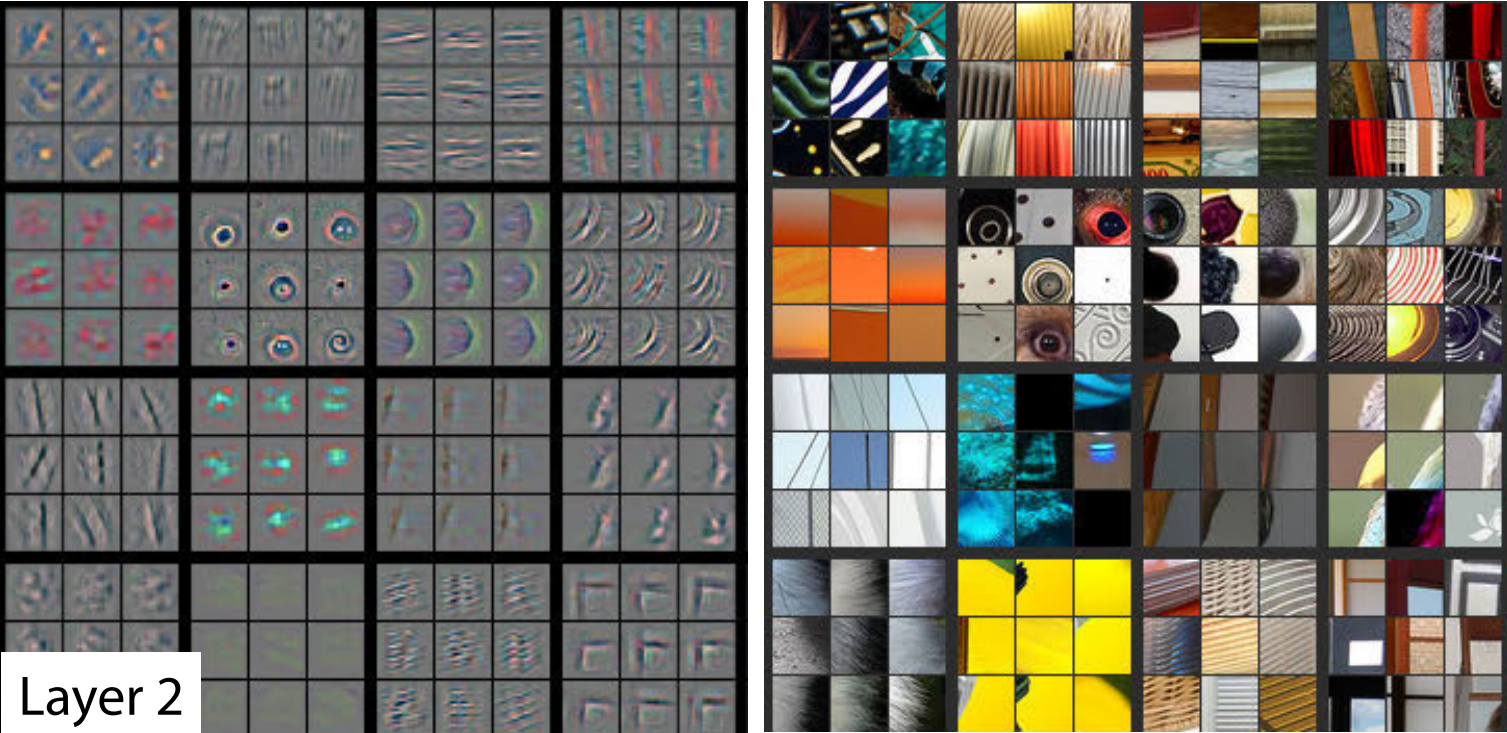

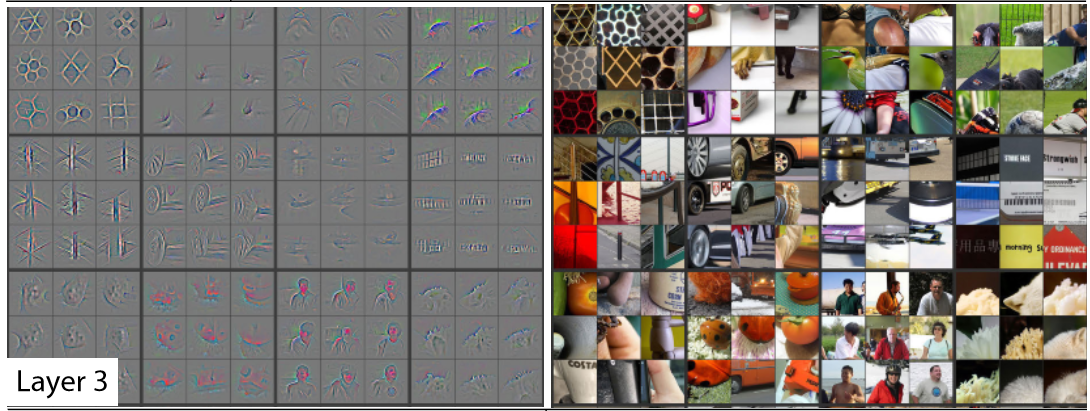

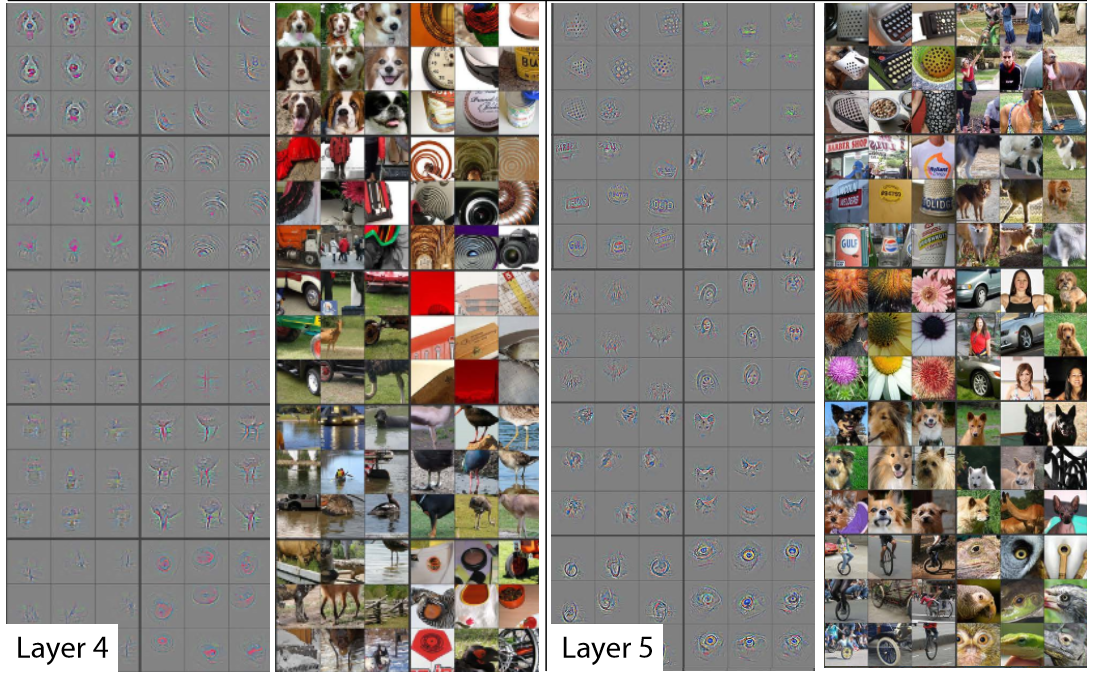

# Module 2: Lets download our own dataset and perform the same experiments

In [ ]:
!pip install -Uqq fastai duckduckgo_search

In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from time import sleep

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [ ]:
bear_types = ['grizzly','black','teddy']

In [ ]:
path = Path('/content/drive/MyDrive/alliance_university/bears')

In [ ]:
if not path.exists():
    path.mkdir()
for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} bear',max_images = 400))
    sleep(10)  # Pause between searches to avoid over-loading server
    resize_images(path/o, max_size=400, dest=path/o)


In [ ]:
fns = get_image_files(path)
fns

In [ ]:
failed = verify_images(fns)
failed ,len(failed)

In [ ]:
failed.map(Path.unlink)

In [ ]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))

In [ ]:
dls_bears = bears.dataloaders(path)

In [ ]:
dls_bears.valid.show_batch(max_n=6, nrows=2)

# Trick 1 :Playing with item_tfms ( Resizing and augmentation)

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
# Random resize crop
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [ ]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
# lets train the model
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=[error_rate, accuracy]).to_fp16()
learn.fit_one_cycle(4)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(6, nrows=2)

In [ ]:
pip install -Uqq fastbook

In [ ]:
import fastbook
fastbook.setup_book()
#hide
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
learn.export('bears_model.pkl')

In [ ]:
learn.save('bear_stage_1')

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:

for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)